# Making fake APY Data

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import requests

In [49]:
dr = pd.date_range(start=(datetime.now()-timedelta(days=90)).date(),end=datetime.now().date())

In [50]:
# Taking the last 3 days worth of trading apy data
# Get the prices from coingecko
def gecko_prices(coins):    
    url = ('https://api.coingecko.com/api/v3/simple/price?ids=%s' + '%%2C%s' * (len(coins)-1) +'&vs_currencies=USD') % tuple(coins)
    res = requests.get(url)
    gecko_prices = res.json()
    return gecko_prices

In [51]:
df = pd.DataFrame(index=dr)

In [52]:
gecko_ids = {'ETH':'ethereum',
             'USDT':'tether'}

In [53]:
price_dict = gecko_prices(gecko_ids.values())

In [172]:
def convert_time_str(timing):
    time_int = int(timing[:-1])
    time_str = timing[-1]
    if time_str == 'H':
        days = time_int/24
        time_period = 'minute'
    elif time_str == 'D':
        days = time_int
        time_period = 'daily'
    elif time_str == 'W':
        days = time_int * 7
        time_period = 'hourly'
    elif time_str == 'M':
        days = time_int * 31
        time_period = 'hourly'

    return days, time_period


"""
Returns the coingecko data in a df from the ticker name
"""
def get_chart_data(coin, days=1, period='minutes'):

    # Get the time string in hours for the api call to coingeckod
#     print('https://api.coingecko.com/api/v3/coins/%s/market_chart?vs_currency=usd&days=%s&interval=%s' % (coin, days, period))
    res = requests.get('https://api.coingecko.com/api/v3/coins/%s/market_chart?vs_currency=usd&days=%s&interval=%s' % (coin, days, period))
    prices_res = res.json().get('prices')
    
    for price in prices_res:
        dt_object = datetime.utcfromtimestamp(price[0]/1000)
        price[0] = dt_object
    df = pd.DataFrame(dict(time=[i[0] for i in prices_res],price=[i[1] for i in prices_res],))


    return df

In [175]:
timing = '90D'
coins = ['ETH', 'USDT']

df = pd.DataFrame()

for coin in coins:
    self_gecko_dict, gecko_mcap = {}, {}

    days, time_period = convert_time_str(timing)
    new_df = get_chart_data(gecko_ids[coin], days=days, period=time_period)
    new_df.rename(columns={'price':coin}, inplace=True)
#     new_df['time'] = new_df['time'].dt.round('1h')  
    if not df.empty:
        df = df.merge(new_df)
    else: 
        df = new_df

In [177]:
df_yield = df.copy()

In [178]:
df_yield['apy'] = [i for i in range(len(df_yield)-1,-1,-1)]

In [194]:
df_yield['dollar'] = df_yield['ETH']

In [195]:
df_yield['il_adj'] =  df_yield['ETH'].iloc[0] / df_yield['ETH'] * df_yield['ETH'].iloc[0]

In [201]:
np.log(365)

TypeError: return arrays must be of ArrayType

In [188]:
df_yield['inc_yield'] = np

,time,ETH,USDT,apy,dollar,il_adj
0,2022-01-24,2537.836728,0.999980,89,2537.836728,2537.836728
1,2022-01-25,2447.831512,1.005232,88,2447.831512,2447.831512
2,2022-01-26,2465.219230,1.001428,87,2465.219230,2465.219230
3,2022-01-27,2470.430412,1.001630,86,2470.430412,2470.430412
4,2022-01-28,2411.863855,1.007038,85,2411.863855,2411.863855
...,...,...,...,...,...,...
85,2022-04-19,3061.890571,1.000781,4,3061.890571,3061.890571
86,2022-04-20,3104.688448,0.999666,3,3104.688448,3104.688448
87,2022-04-21,3079.676478,0.999995,2,3079.676478,3079.676478
88,2022-04-22,2987.488876,1.000616,1,2987.488876,2987.488876


In [196]:
df_yield

,time,ETH,USDT,apy,dollar,il_adj
0,2022-01-24,2537.836728,0.999980,89,2537.836728,2537.836728
1,2022-01-25,2447.831512,1.005232,88,2447.831512,2631.151378
2,2022-01-26,2465.219230,1.001428,87,2465.219230,2612.593306
3,2022-01-27,2470.430412,1.001630,86,2470.430412,2607.082242
4,2022-01-28,2411.863855,1.007038,85,2411.863855,2670.389227
...,...,...,...,...,...,...
85,2022-04-19,3061.890571,1.000781,4,3061.890571,2103.476629
86,2022-04-20,3104.688448,0.999666,3,3104.688448,2074.480376
87,2022-04-21,3079.676478,0.999995,2,3079.676478,2091.328522
88,2022-04-22,2987.488876,1.000616,1,2987.488876,2155.862507


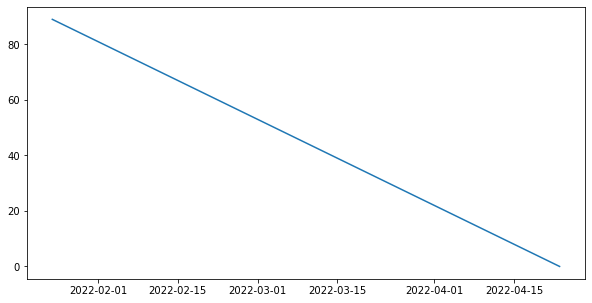

In [189]:
fig = plt.figure(figsize=(10,5))
plt.plot(df_yield.time, df_yield.apy)

In [182]:
notif_level = 50

In [ ]:
notif = {"below threshold"}